In [279]:
import os; print(os.listdir("ensae_competition_2016"))
import sys; print(sys.version_info)
import pandas as pd ; print(pd.__version__)
import sklearn; print(sklearn.__version__)


['ensae_competition_test_X.txt', 'ensae_competition_train.txt']
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
1.4.1
1.0.2


In [280]:
df_test = pd.read_csv("ensae_competition_2016/ensae_competition_test_X.txt", header=[0, 1], encoding="utf8", index_col=0, sep="\t")
# df_test.loc[12]

# Reading Train DataFrame

In [281]:
df = pd.read_csv("ensae_competition_2016/ensae_competition_train.txt", header=[0, 1], encoding="utf8", index_col=0, sep="\t")
print(df.shape)
df.head(3)

(22500, 24)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,180000,1,2,1,47,0,0,0,0,0,...,99694,65977,67415,3700,3700,4100,2360,2500,2618,0
1,110000,2,2,1,35,0,0,0,0,0,...,4869,4966,5070,1053,1073,1081,178,184,185,1
2,70000,2,2,2,22,0,0,0,0,0,...,69927,50579,49483,2501,3001,2608,1777,1792,1793,1


In [282]:
df.columns

MultiIndex([( 'X1',                  'LIMIT_BAL'),
            ( 'X2',                        'SEX'),
            ( 'X3',                  'EDUCATION'),
            ( 'X4',                   'MARRIAGE'),
            ( 'X5',                        'AGE'),
            ( 'X6',                      'PAY_0'),
            ( 'X7',                      'PAY_2'),
            ( 'X8',                      'PAY_3'),
            ( 'X9',                      'PAY_4'),
            ('X10',                      'PAY_5'),
            ('X11',                      'PAY_6'),
            ('X12',                  'BILL_AMT1'),
            ('X13',                  'BILL_AMT2'),
            ('X14',                  'BILL_AMT3'),
            ('X15',                  'BILL_AMT4'),
            ('X16',                  'BILL_AMT5'),
            ('X17',                  'BILL_AMT6'),
            ('X18',                   'PAY_AMT1'),
            ('X19',                   'PAY_AMT2'),
            ('X20',            

# Columns
### We get rid of the multindex
### And then names to lower case + '_'

In [283]:
df.columns = df.columns.droplevel()
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name='ID')

In [284]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
# Pareil que 
# df.columns = df.columns.map(lambda c: c.lower().replace(" ", "_"))

In [285]:
df = df.rename(columns={"default_payment_next_month": "y" , "pay_0": "pay_1"})

### Columns all contain  `int64`

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 0 to 22499
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   limit_bal  22500 non-null  int64
 1   sex        22500 non-null  int64
 2   education  22500 non-null  int64
 3   marriage   22500 non-null  int64
 4   age        22500 non-null  int64
 5   pay_1      22500 non-null  int64
 6   pay_2      22500 non-null  int64
 7   pay_3      22500 non-null  int64
 8   pay_4      22500 non-null  int64
 9   pay_5      22500 non-null  int64
 10  pay_6      22500 non-null  int64
 11  bill_amt1  22500 non-null  int64
 12  bill_amt2  22500 non-null  int64
 13  bill_amt3  22500 non-null  int64
 14  bill_amt4  22500 non-null  int64
 15  bill_amt5  22500 non-null  int64
 16  bill_amt6  22500 non-null  int64
 17  pay_amt1   22500 non-null  int64
 18  pay_amt2   22500 non-null  int64
 19  pay_amt3   22500 non-null  int64
 20  pay_amt4   22500 non-null  int64
 21  pay_amt5   2

This research employed a binary variable, default payment (Yes = 1, No = 0),
as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: - X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. - X2: Gender (1 = male; 2 = female). - X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). - X4: Marital status (1 = married; 2 = single; 3 = others). - X5: Age (year). - X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; …;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; …; 8 = payment delay for eight months; 9 = payment delay for nine months and above. - X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; …; X17 = amount of bill statement in April, 2005. - X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; …;X23 = amount paid in April, 2005.

In [287]:
df.sex.value_counts()

2    13577
1     8923
Name: sex, dtype: int64

# Statistics

### Faire défaut  = 1 
### Ne pas faire défault = 0 


- Men are coded with sex=1 and mean of Default = 24 %
- Women are coded with sex=2 and mean of Default = 20 %
-> Vérifie ça avec un test statistique d'égalité des moyennes

In [288]:
df.groupby("sex").y.mean()

sex
1    0.242071
2    0.207704
Name: y, dtype: float64


- Graduate are coded with 1 and mean of Default = 19 %
- Univ are coded with 2 and mean of Default = 23 %
- HighSchool are coded with 3 and mean of Default = 25 %

- When level of education increases, default decrease

In [289]:
df.groupby("education").y.mean()

education
0    0.000000
1    0.190804
2    0.237493
3    0.253312
4    0.072917
5    0.080189
6    0.125000
Name: y, dtype: float64

In [290]:
# df[[c for c in df.columns if c.startswith("pay") or c.startswith("bill")]]

- Percentage of `limit_bal` paid back during the last 6 months

<AxesSubplot:>

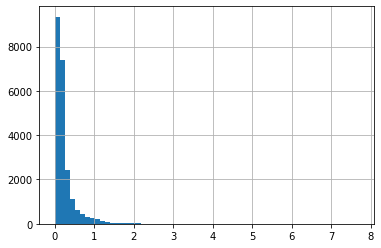

In [291]:
# Le pourcentage total remboursé sur les 6 derniers mois
df["percentage_6_months"] = df[[c for c in df.columns if c.startswith("pay_amt")]].sum(axis=1) / df["limit_bal"]
df["percentage_6_months"].hist(bins=60)

<AxesSubplot:ylabel='percentage_6_months_q10'>

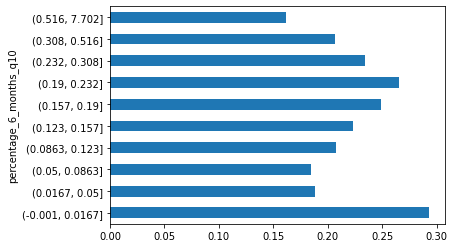

In [292]:
df["percentage_6_months_q10"] = pd.qcut(df["percentage_6_months"], 10)
df.groupby("percentage_6_months_q10").y.mean().plot.barh()

In [293]:
df.groupby("percentage_6_months_q10").y.mean().index[0].right

0.0167

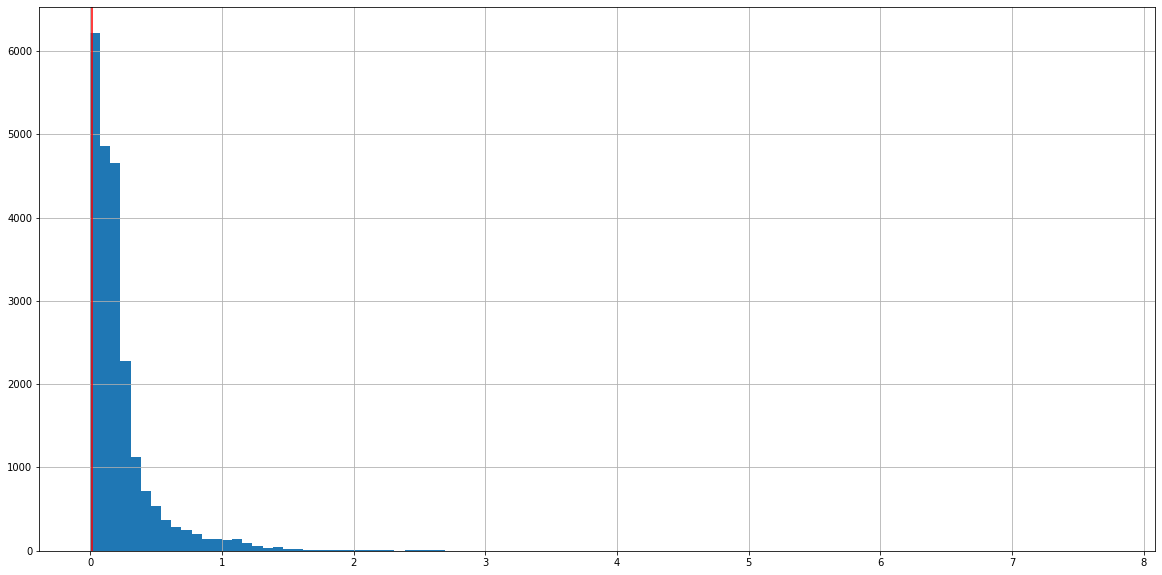

In [294]:
upper_bound_lowest_class = df.groupby("percentage_6_months_q10").y.mean().index[0].right

plt.figure(figsize=(20, 10))
df.percentage_6_months.hist(bins=100)
plt.axvline(upper_bound_lowest_class, color="red")

# Building first model
- With balanced class for target `y` :
    - We use the 4980 rows with `y=1`
    - We delete rows `y=0` to keep only 4980 of them
        

In [295]:
df_1 = df[df.y==1]
df_0 = df[df.y==0].sample(n=df_1.shape[0])

df_balanced = pd.concat([df_0, df_1], axis=0)

data = df_balanced.copy()

## Variables : 
- percentage_6_months : 
    - % of the load_balance paid back during the last 6 months
- sex : 
    is_woman (so if man, this variable equal 0, if woman equals 1)
- education@

In [296]:
list_of_X = [
    pd.get_dummies(data.sex.astype(str), drop_first=True).rename(columns={"2": "is_woman"}),
    data["percentage_6_months"],
    pd.get_dummies(data.education.astype(str), drop_first=True)
]
X = pd.concat(list_of_X, axis=1)
Y = data.y

In [297]:
# data

# Regression Logistique


### On batit un score avec un modèle linéaire (=comme la régression linéaire)

$ Score = a_1 \times X_1 + a_2 \times X_2 + a_3 \times X_3 ...$ 

### Ce score est en fait égal à :
$ Score = ln(\frac{\mathbb{P}(Y=1|X)}{1-\mathbb{P}(Y=1|X)}) = ln(\frac{\mathbb{P}(Y=1|X)}{\mathbb{P}(Y=0|X)})$


### On peut montrer par le calcul que la probabilité que Y=1 sachant X vaut : 

$\mathbb{P}(Y=1|X) = \dfrac{1}{1+e^{-Score}}$



### Donc : 

$Proba(Y=1 \text{ sachant } X) = \mathbb{P}(Y=1|X) = f(Score) $ avec $f$ qui est la fonction logistique

### $ f(x) = \frac{1}{1+e^{-x}} $ 

In [298]:
X_train = X.sample(n=int(len(X)*0.70))
Y_train = Y[Y.index.isin(X_train.index)]


X_test = X[~X.index.isin(X_train.index)]
Y_test = Y[~Y.index.isin(X_train.index)]

In [299]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

def pipeline(classifier, X_train, X_test, Y_train, Y_test):
   
    #fit the classifier with our training data
    classifier.fit(X_train, Y_train)
    
    #predict the labels of our train data and store them in train_preds
    train_preds = classifier.predict(X_train)

    #predict the labels of our test data and store them in test_preds
    test_preds = classifier.predict(X_test)
    
    print('Training accuracy: ', accuracy_score(Y_train, train_preds))
    print('Testing accuracy: ', accuracy_score(Y_test, test_preds))
    
    print('Testing Report: \n',classification_report(Y_test, test_preds))
    
    cm_nb = confusion_matrix(Y_test, test_preds)
    plt.figure(figsize = (6, 6));
    plt.title(classifier);
    
    return sns.heatmap(cm_nb, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"), plt.xlabel('Predicted Label'),plt.ylabel('True Label');

Training accuracy:  0.5123350545037292
Testing accuracy:  0.45917001338688085
Testing Report: 
               precision    recall  f1-score   support

           0       0.47      0.55      0.50      1497
           1       0.45      0.37      0.41      1491

    accuracy                           0.46      2988
   macro avg       0.46      0.46      0.45      2988
weighted avg       0.46      0.46      0.45      2988



(<AxesSubplot:title={'center':'LogisticRegression()'}, xlabel='Predicted Label', ylabel='True Label'>,
 Text(0.5, 62.15999999999998, 'Predicted Label'),
 Text(33.0, 0.5, 'True Label'))

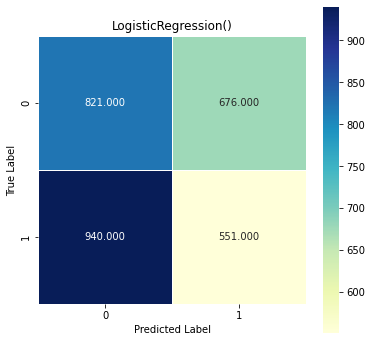

In [300]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=True)

pipeline(
    classifier=lr,
    X_train=X_train, 
    X_test=X_test, 
    Y_train=Y_train, 
    Y_test=Y_test
)

Training accuracy:  0.9578313253012049
Testing accuracy:  0.47690763052208834
Testing Report: 
               precision    recall  f1-score   support

           0       0.48      0.48      0.48      1497
           1       0.48      0.48      0.48      1491

    accuracy                           0.48      2988
   macro avg       0.48      0.48      0.48      2988
weighted avg       0.48      0.48      0.48      2988



(<AxesSubplot:title={'center':'RandomForestClassifier()'}, xlabel='Predicted Label', ylabel='True Label'>,
 Text(0.5, 62.15999999999998, 'Predicted Label'),
 Text(33.0, 0.5, 'True Label'))

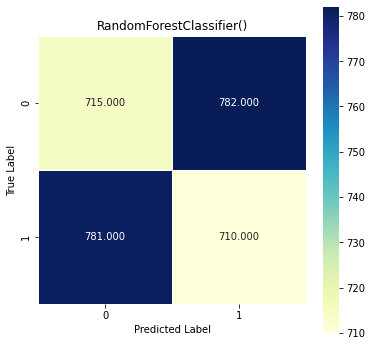

In [301]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

pipeline(
    classifier=rf,
    X_train=X_train, 
    X_test=X_test, 
    Y_train=Y_train, 
    Y_test=Y_test
)

Training accuracy:  0.8548479632816982
Testing accuracy:  0.4923025435073628
Testing Report: 
               precision    recall  f1-score   support

           0       0.49      0.55      0.52      1497
           1       0.49      0.43      0.46      1491

    accuracy                           0.49      2988
   macro avg       0.49      0.49      0.49      2988
weighted avg       0.49      0.49      0.49      2988



(<AxesSubplot:title={'center':'RandomForestClassifier(n_estimators=4)'}, xlabel='Predicted Label', ylabel='True Label'>,
 Text(0.5, 62.15999999999998, 'Predicted Label'),
 Text(33.0, 0.5, 'True Label'))

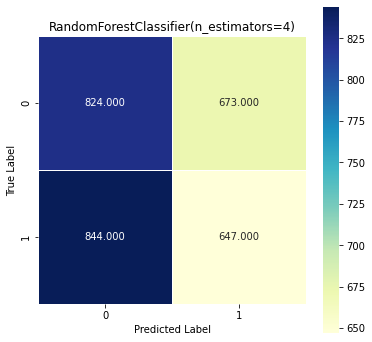

In [302]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
n_estimators=4
)

pipeline(
    classifier=rf,
    X_train=X_train, 
    X_test=X_test, 
    Y_train=Y_train, 
    Y_test=Y_test
)

Training accuracy:  0.6356855995410212
Testing accuracy:  0.5036813922356091
Testing Report: 
               precision    recall  f1-score   support

           0       0.52      0.35      0.42      1531
           1       0.49      0.67      0.57      1457

    accuracy                           0.50      2988
   macro avg       0.51      0.51      0.49      2988
weighted avg       0.51      0.50      0.49      2988



(<AxesSubplot:title={'center':'RandomForestClassifier(max_depth=6, max_features=10, n_estimators=20,\n                       random_state=18)'}, xlabel='Predicted Label', ylabel='True Label'>,
 Text(0.5, 62.15999999999998, 'Predicted Label'),
 Text(33.0, 0.5, 'True Label'))

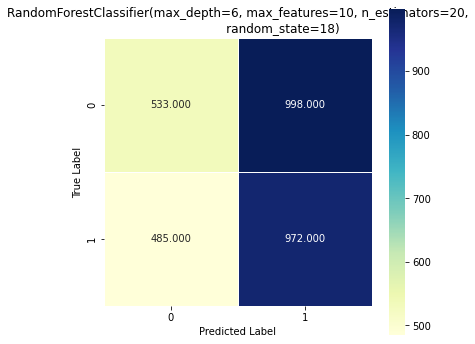

In [304]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_ml = data.select_dtypes(include=numerics).copy()

X_train = data_ml.drop("y", axis=1).sample(n=int(len(X)*0.70))
Y_train = data_ml[data_ml.index.isin(X_train.index)].y


X_test = data_ml[~data_ml.index.isin(X_train.index)].drop("y", axis=1)
Y_test = data_ml[~data_ml.index.isin(X_train.index)].y

rf = RandomForestClassifier(
n_estimators=20,
    max_depth=6,
    max_features = 10, 
    bootstrap = True, 
    random_state = 18
)

pipeline(
    classifier=rf,
    X_train=X_train, 
    X_test=X_test, 
    Y_train=Y_train, 
    Y_test=Y_test
)

Training accuracy:  0.5100401606425703
Testing accuracy:  0.4882864792503347
Testing Report: 
               precision    recall  f1-score   support

           0       0.49      0.83      0.61      1474
           1       0.48      0.16      0.24      1514

    accuracy                           0.49      2988
   macro avg       0.49      0.49      0.43      2988
weighted avg       0.49      0.49      0.42      2988



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


(<AxesSubplot:title={'center':'LogisticRegression()'}, xlabel='Predicted Label', ylabel='True Label'>,
 Text(0.5, 62.15999999999998, 'Predicted Label'),
 Text(33.0, 0.5, 'True Label'))

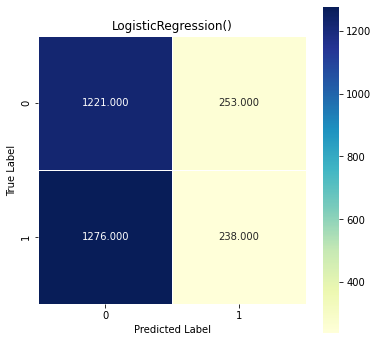

In [268]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_ml = data.select_dtypes(include=numerics).copy()

data_ml = pd.concat(
    [
        data_ml.drop(["sex", "education", "marriage"], axis=1),
        pd.get_dummies(data_ml["sex"], drop_first=True),
        pd.get_dummies(data_ml["education"], drop_first=True),
        pd.get_dummies(data_ml["marriage"], drop_first=True)
    ],
    axis=1
)

X_train = data_ml.drop("y", axis=1).sample(n=int(len(X)*0.70))
Y_train = data_ml[data_ml.index.isin(X_train.index)].y


X_test = data_ml[~data_ml.index.isin(X_train.index)].drop("y", axis=1)
Y_test = data_ml[~data_ml.index.isin(X_train.index)].y


lr = LogisticRegression()

pipeline(
    classifier=lr,
    X_train=X_train, 
    X_test=X_test, 
    Y_train=Y_train, 
    Y_test=Y_test
)

In [272]:
from sklearn.ensemble import GradientBoostingClassifier

data_ml = data.select_dtypes(include=numerics).copy()


X_train = data_ml.drop("y", axis=1).sample(n=int(len(X)*0.70))
Y_train = data_ml[data_ml.index.isin(X_train.index)].y


X_test = data_ml[~data_ml.index.isin(X_train.index)].drop("y", axis=1)
Y_test = data_ml[~data_ml.index.isin(X_train.index)].y


GBR = GradientBoostingClassifier()
GBR.fit(X_train,Y_train)
predicted = GBR.predict(X_test)

print(confusion_matrix(Y_test, predicted))

[[743 755]
 [851 639]]


coefficient is_woman -0.21839816835175416
coefficient percentage_6_months -0.3561743655669664
coefficient 1 0.411169494648158
coefficient 2 0.6997570598042814
coefficient 3 0.8009122185891976
coefficient 4 -0.5824660317825744
coefficient 5 -0.4048454185527318
coefficient 6 -0.17097667890042936


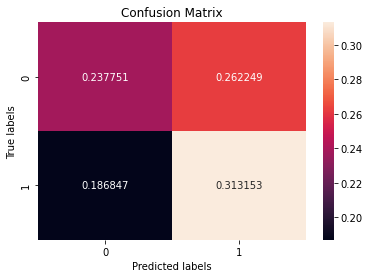

In [211]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(20, 10))
#plt.scatter(Y, predictions)

for col, coef in zip(X.columns, lr.coef_[0]):
    print("coefficient", col, coef)

    
cm = confusion_matrix(Y, predictions)

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm / cm.sum().sum(), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

## 55 % of correct predictions (ie = Accuracy)

In [163]:
import numpy as np
(cm[0][0] + cm[1][1]) / np.sum(cm)

0.5509036144578313

In [165]:
df_balanced.y.value_counts()

0    4980
1    4980
Name: y, dtype: int64

In [168]:
from sklearn.metrics import precision_recall_fscore_support
prfs = precision_recall_fscore_support(Y, predictions)
# Precision 
# Recall -> How luch did we find from a specific class ?
# 47 % pour 0 : we found 47 % of the people who paid pack
# 62 % pour 1 : we found 62 % of people who defaulted
prfs[1] 

# FbetaScore
# Support

array([0.47550201, 0.62630522])

In [ ]:
##

### 

### Preprocessing of the $X$ values

#### Quantitative variable


- pay_[] : 
    - 0 and -1 mean the same thing for now


#### Qualitative variable

- 0 or 1 : 
    - Sex (instead 1 or 2)


- Multiple : 
    - Education 
        - 1 = graduate school; 
        - 2 = university
        - 3 = high school
        - 4 = others
        + others values (260 rows in total = 1.15 %) 
        
    - Marriage 
        - 1 = married
        - 2 = single
        - 3 = others